## Tracy Owusu 
### 500819150

## Table of context

1. [Dataset](#Dataset)
2. [Analyse probleem](#Analyse)
3. [Voorspelling en methoden](#Voorspelling)
4. [Preprocessing](#Preprocessing)
5. [Naive bayes](#Naive)
6. [Decision tree](#Decision)
7. [Evaluatie/conclusie](#Evaluatie/conclusie)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## Dataset

Deze dataset is een dataset over de muziek van Taylor Swift. Ik heb de dataset van [kaggle](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-spotify-data).

## Analyse probleem

Voor deze opdracht wil ik graag albums van Taylor Swift voorspellen. Het is een classifiatie probleem. Deze dataset bestaat uit 16 features en heeft 171 rijen aan data. Het heeft de features zijn **name, album, artist, release_date, length, popularity, danceability, acousticness, energy,  instrumentalness, liveness, loudness, speechiness, valence** en **tempo**. 

**Name** geeft de naam van een liedje.<br>
**Album** geeft de naam van een album.<br>
**Artist** is de naam van de artiest.<br>
**Release_date** is de datum wanneer het album uitgebracht is.<br>
**Length** is de lengte van het liedje in seconden.<br>
**Popularity** is de populariteit van een liedje gebasseerd op het algorithme in procent aangeven.<br>
**Danceability** geeft aan hoe 'dansbaar' een liedje is aan de hand van een combinatie van tempo, stabiliteit van ritme, sterkte van de best en regelamtigheid.<br>
**Acousticness** is aan hoe akoestisch een liedje is.<br>
**Energy** is de gemeten perceptie van intensiteit en activiteit.<br>
**Instrumentaliteit** is de hoeveelheid gezang er in het liedje.<br>
**Liveness** is de mogelijkheid dat het liedje opgenomen was bij het bij zijn van een publiek.<br>
**Loudness** is de kans dat het liedje op een hogere volume is opgenomen.<br>
**Speechiness** is het bij zijn van gesproken woorden. Als het de speechiness boven 0.66 betekent dat het waarschijnlijk gemaakt uit gesproken woorden, als het tussen de 0.33 en 0.66 bestaat het uit een mengsel van beide. Als het onder 0.33 betekent het dat de song geen gesproken woorden heeft.<br>
**Valence** is een meeting van hoe blij of verdrietig gesproken woorden klinken. <br>
**Tempo** is het aan beats per minuut.

In [2]:
data=pd.read_csv('spotify_taylorswift.csv')
data

Unnamed: 0                                               name  \
0             0                                         Tim McGraw   
1             1                                    Picture To Burn   
2             2        Teardrops On My Guitar - Radio Single Remix   
3             3                              A Place in this World   
4             4                                        Cold As You   
..          ...                                                ...   
166         166  Mr. Perfectly Fine (Taylor’s Version) (From Th...   
167         167  We Were Happy (Taylor’s Version) (From The Vault)   
168         168  That’s When (feat. Keith Urban) (Taylor’s Vers...   
169         169      Don’t You (Taylor’s Version) (From The Vault)   
170         170   Bye Bye Baby (Taylor’s Version) (From The Vault)   

                           album        artist release_date  length  \
0                   Taylor Swift  Taylor Swift   2006-10-24  232106   
1                   Taylor Swift  Taylor Swift   2006-10-24  173066   
2                   Taylor Swift  Taylor Swift   2006-10-24  203040   
3                   Taylor Swift  Taylor Swift   2006-10-24  199200   
4                   Taylor Swift  Taylor Swift   2006-10-24  239013   
..                           ...           ...          ...     ...   
166  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  277591   
167  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  244236   
168  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  189495   
169  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  208608   
170  Fearless (Taylor's Version)  Taylor Swift   2021-04-09  242157   

     popularity  danceability  acousticness  energy  instrumentalness  \
0            49         0.580         0.575   0.491          0.000000   
1            54         0.658         0.173   0.877          0.000000   
2            59         0.621         0.288   0.417          0.000000   
3            49         0.576         0.051   0.777          0.000000   
4            50         0.418         0.217   0.482          0.000000   
..          ...           ...           ...     ...               ...   
166          74         0.660         0.162   0.817          0.000000   
167          65         0.609         0.849   0.373          0.000000   
168          67         0.588         0.225   0.608          0.000000   
169          66         0.563         0.514   0.473          0.000012   
170          64         0.624         0.334   0.624          0.000000   

     liveness  loudness  speechiness  valence    tempo  
0      0.1210    -6.462       0.0251    0.425   76.009  
1      0.0962    -2.098       0.0323    0.821  105.586  
2      0.1190    -6.941       0.0231    0.289   99.953  
3      0.3200    -2.881       0.0324    0.428  115.028  
4      0.1230    -5.769       0.0266    0.261  175.558  
..        ...       ...          ...      ...      ...  
166    0.0667    -6.269       0.0521    0.714  135.942  
167    0.0779    -8.819       0.0263    0.130  106.007  
168    0.0920    -7.062       0.0365    0.508   90.201  
169    0.1090   -11.548       0.0503    0.405  101.934  
170    0.0995    -7.860       0.0539    0.527   80.132  

[171 rows x 16 columns]

In [3]:
data.dtypes

Unnamed: 0            int64
name                 object
album                object
artist               object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

## Voorspelling en methiden

De classifiers die ik ga gebruiken om te voorspellen is de **Naive bayes en de Decision tree**. 

Naive bayes is een classifier die probalistisch werkt. De decision tree is een model dat weergeven kan worden als een boomachtige structuur en elke tak toont een beslissing.

Ik voorspel dat naive bayes een beter resultaat zal opleveren, vanwege het hoge overfittings kans dat de decision tree heeft.

Ik ben van plan om de features Unamed, name, artists anme en release date niet me te tellen voor het experiment. 

De redenen:<br>
**Unamed** is duidelijk een lijst die alleen de nummers aangeven.<br>
**Name** is de titel van het liedje ik denk dat een titel in het geval van een experiment zoals dit geen benut heeft.<br>
**Artists name** gebruik ik niet, omdat de hele data set over taylor swift gaat dus het is ook niet nodig aangezien elke data van een liedje van haar is.<br>
**Release date** heeft een directe correlatie met de album. Een release datum geeft gelijk aan welke album het is en ik wil het experiment interesant houden en hoe goed het zonder lukt.<br>

In [4]:
le = LabelEncoder()
selectect_columns = ["Taylor Swift", "Speak Now (Deluxe Package)", "Red (Deluxe Edition)", "1989 (Deluxe)", "reputation", "Lover", "folklore (deluxe version)", "evermore (deluxe version)","Fearless (Taylor's Version)"]
data["album"] = le.fit_transform(data["album"])
print("Om ook de albums makkelijker kunnen vergelijken heb ik ze met een labelencoder.")
print(data)

print("Hierbij zijn de albums: \n 0: 1989 (Deluxe) \n 1: Fearless (Taylor's Version) \n 2: Lover \n 3: Red (Deluxe Edition) \n 4: Speak Now (Deluxe Package) \n 5: Taylor Swift \n 6: evermore (deluxe version) \n 7: folklore (deluxe version) \n 8: reputation")

Om ook de albums makkelijker kunnen vergelijken heb ik ze met een labelencoder.
     Unnamed: 0                                               name  album  \
0             0                                         Tim McGraw      5   
1             1                                    Picture To Burn      5   
2             2        Teardrops On My Guitar - Radio Single Remix      5   
3             3                              A Place in this World      5   
4             4                                        Cold As You      5   
..          ...                                                ...    ...   
166         166  Mr. Perfectly Fine (Taylor’s Version) (From Th...      1   
167         167  We Were Happy (Taylor’s Version) (From The Vault)      1   
168         168  That’s When (feat. Keith Urban) (Taylor’s Vers...      1   
169         169      Don’t You (Taylor’s Version) (From The Vault)      1   
170         170   Bye Bye Baby (Taylor’s Version) (From The Vault)      1

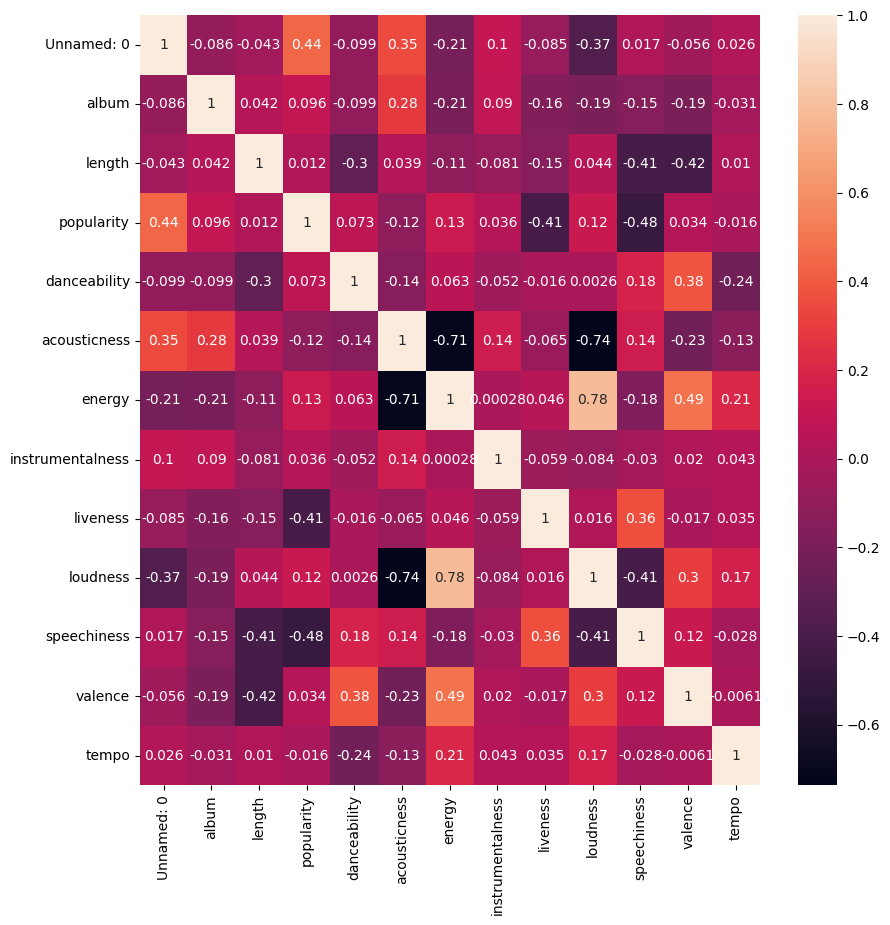

In [5]:
cor = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
data = data.drop(["Unnamed: 0", "name", "artist", "release_date"], axis = 1)

In [7]:
data

album  length  popularity  danceability  acousticness  energy  \
0        5  232106          49         0.580         0.575   0.491   
1        5  173066          54         0.658         0.173   0.877   
2        5  203040          59         0.621         0.288   0.417   
3        5  199200          49         0.576         0.051   0.777   
4        5  239013          50         0.418         0.217   0.482   
..     ...     ...         ...           ...           ...     ...   
166      1  277591          74         0.660         0.162   0.817   
167      1  244236          65         0.609         0.849   0.373   
168      1  189495          67         0.588         0.225   0.608   
169      1  208608          66         0.563         0.514   0.473   
170      1  242157          64         0.624         0.334   0.624   

     instrumentalness  liveness  loudness  speechiness  valence    tempo  
0            0.000000    0.1210    -6.462       0.0251    0.425   76.009  
1            0.000000    0.0962    -2.098       0.0323    0.821  105.586  
2            0.000000    0.1190    -6.941       0.0231    0.289   99.953  
3            0.000000    0.3200    -2.881       0.0324    0.428  115.028  
4            0.000000    0.1230    -5.769       0.0266    0.261  175.558  
..                ...       ...       ...          ...      ...      ...  
166          0.000000    0.0667    -6.269       0.0521    0.714  135.942  
167          0.000000    0.0779    -8.819       0.0263    0.130  106.007  
168          0.000000    0.0920    -7.062       0.0365    0.508   90.201  
169          0.000012    0.1090   -11.548       0.0503    0.405  101.934  
170          0.000000    0.0995    -7.860       0.0539    0.527   80.132  

[171 rows x 12 columns]

### Preprossing

In [8]:
x = data.drop(["album"], axis = 1)
y = data['album']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

### Naive Bayes

In [10]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_score = metrics.accuracy_score(gnb_pred, y_test)
gnb_score

0.34285714285714286

### Decision tree

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_score = metrics.accuracy_score(dtc_pred, y_test)
dtc_score

0.37142857142857144

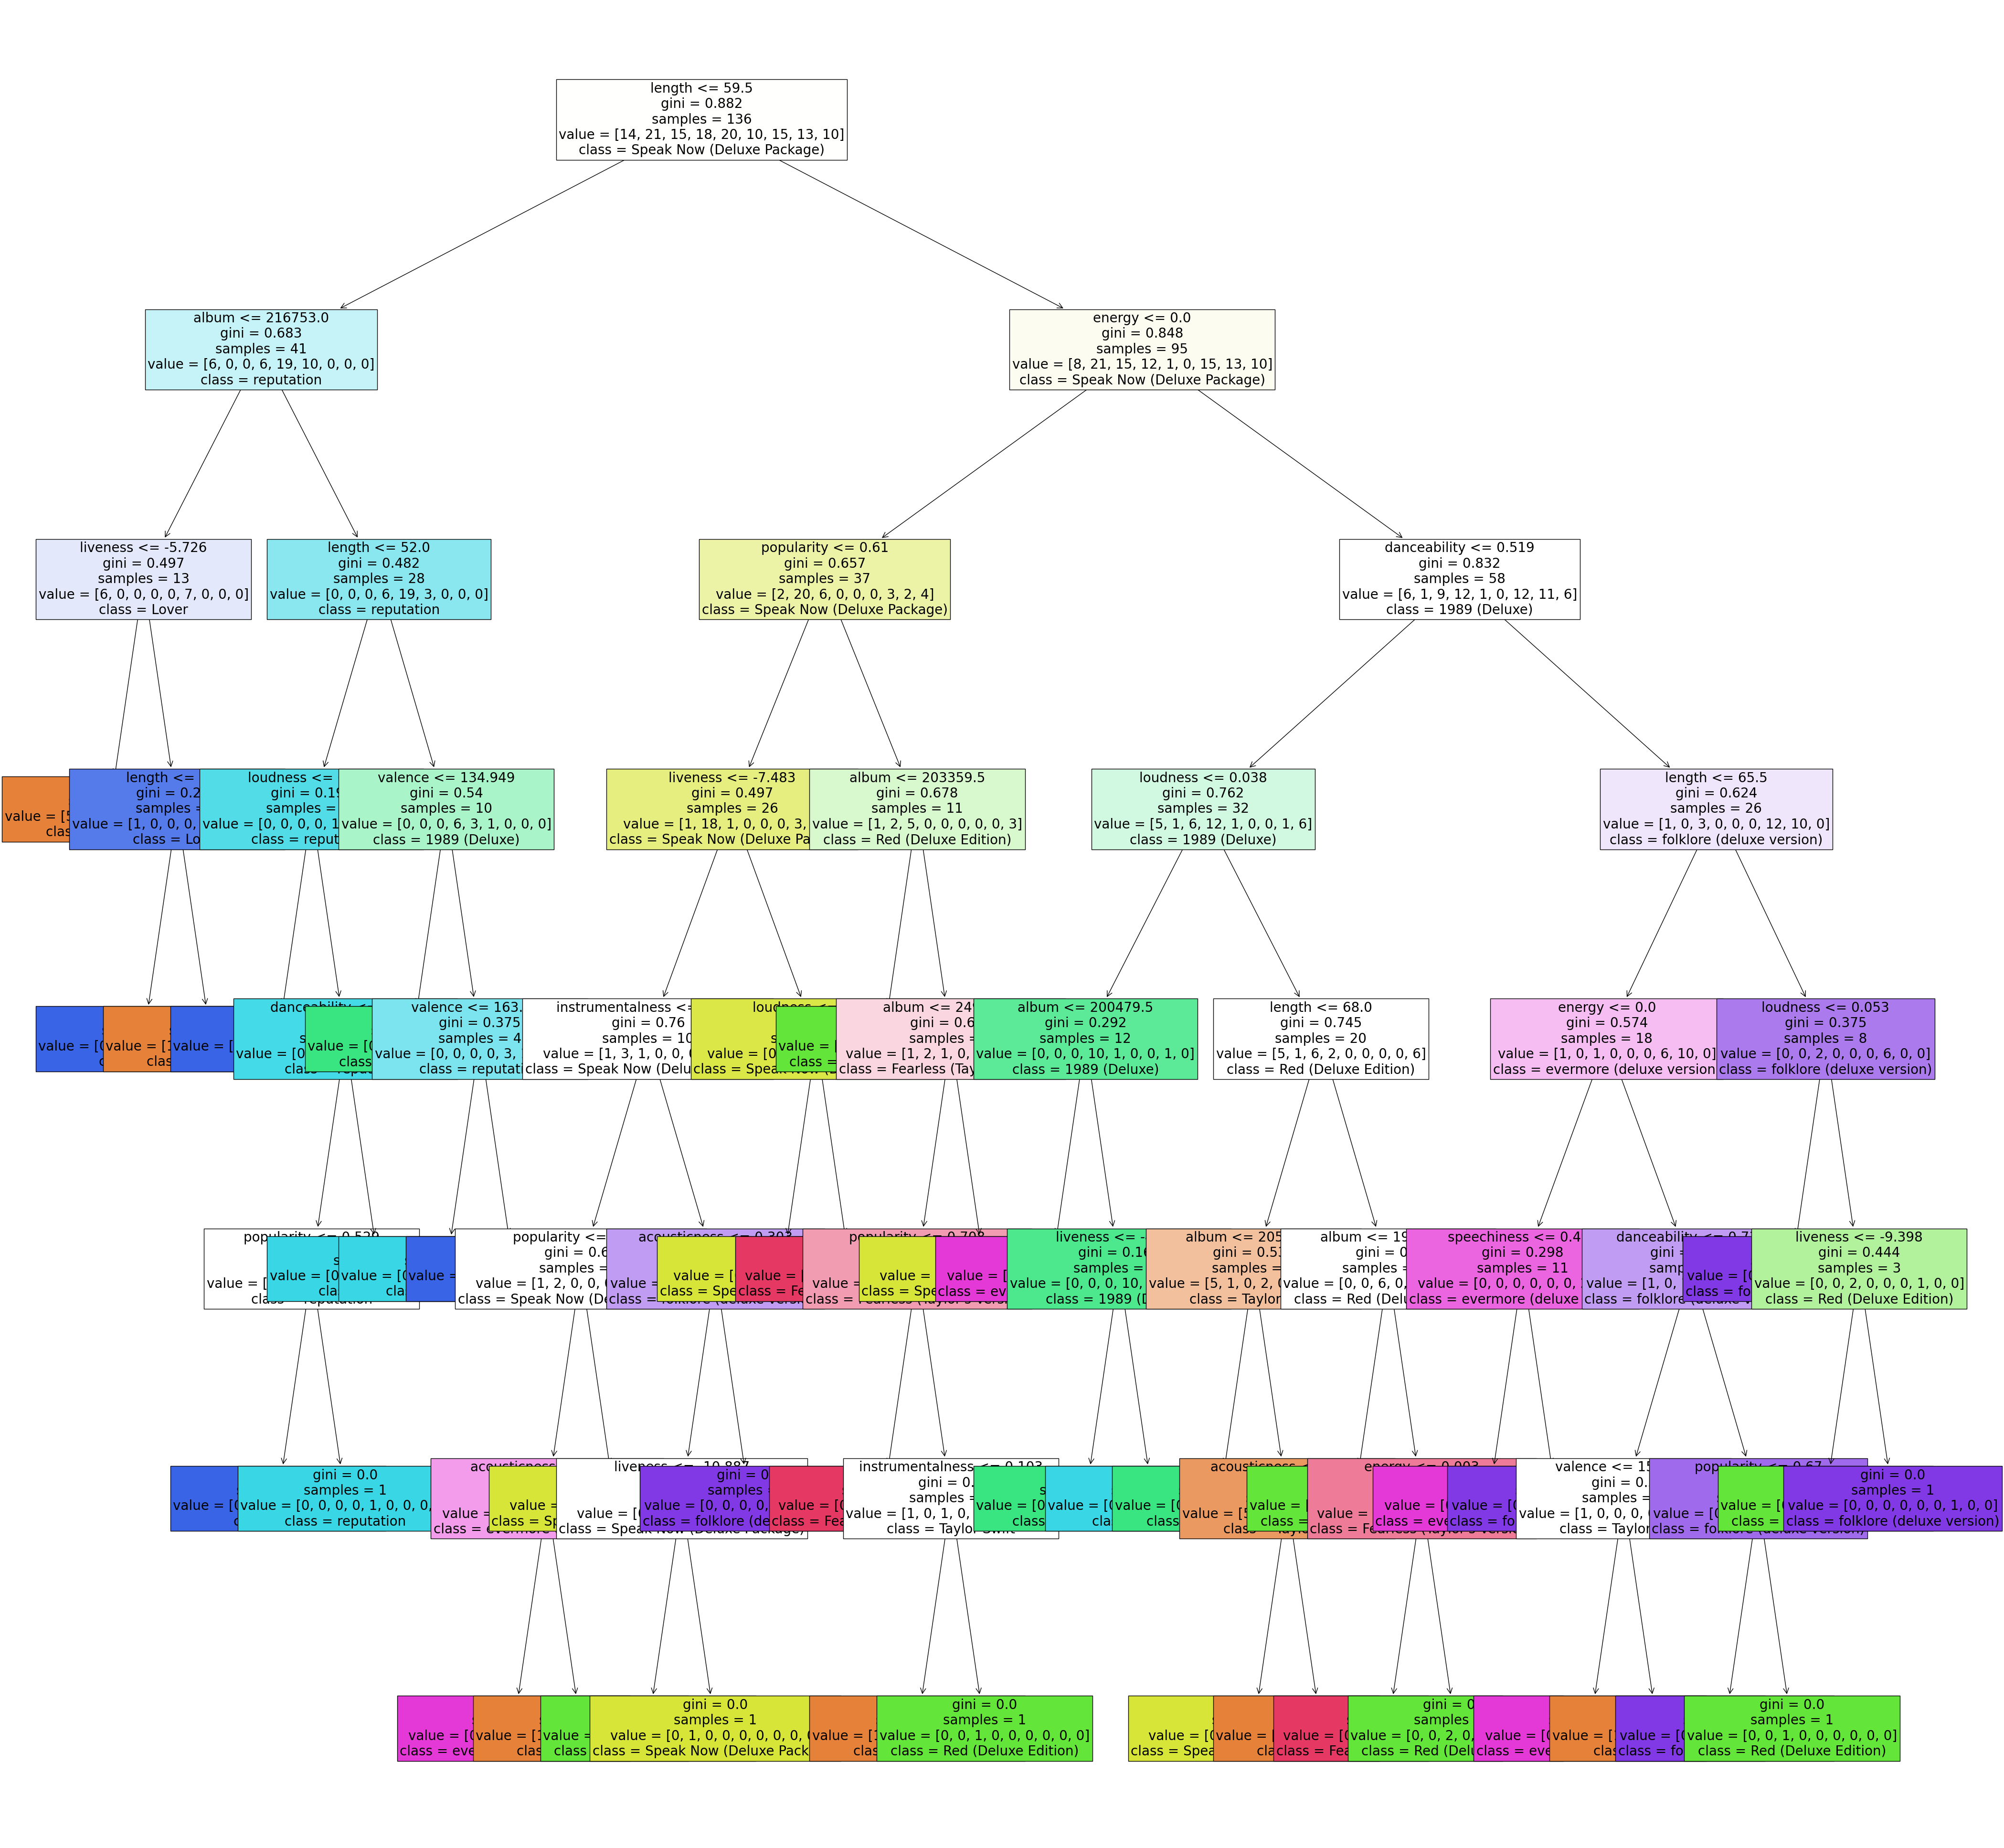

In [12]:
plt.figure(figsize=(50,50))

fn=['album','length','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
cn=["Taylor Swift", "Speak Now (Deluxe Package)", "Red (Deluxe Edition)", "1989 (Deluxe)", "reputation", "Lover", "folklore (deluxe version)", "evermore (deluxe version)","Fearless (Taylor's Version)"]

tree.plot_tree(dtc, feature_names = fn,class_names=cn, filled = True, fontsize=20)
plt.show()

In [13]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_score = metrics.accuracy_score(dtc_pred, y_test)
dtc_score

0.42857142857142855

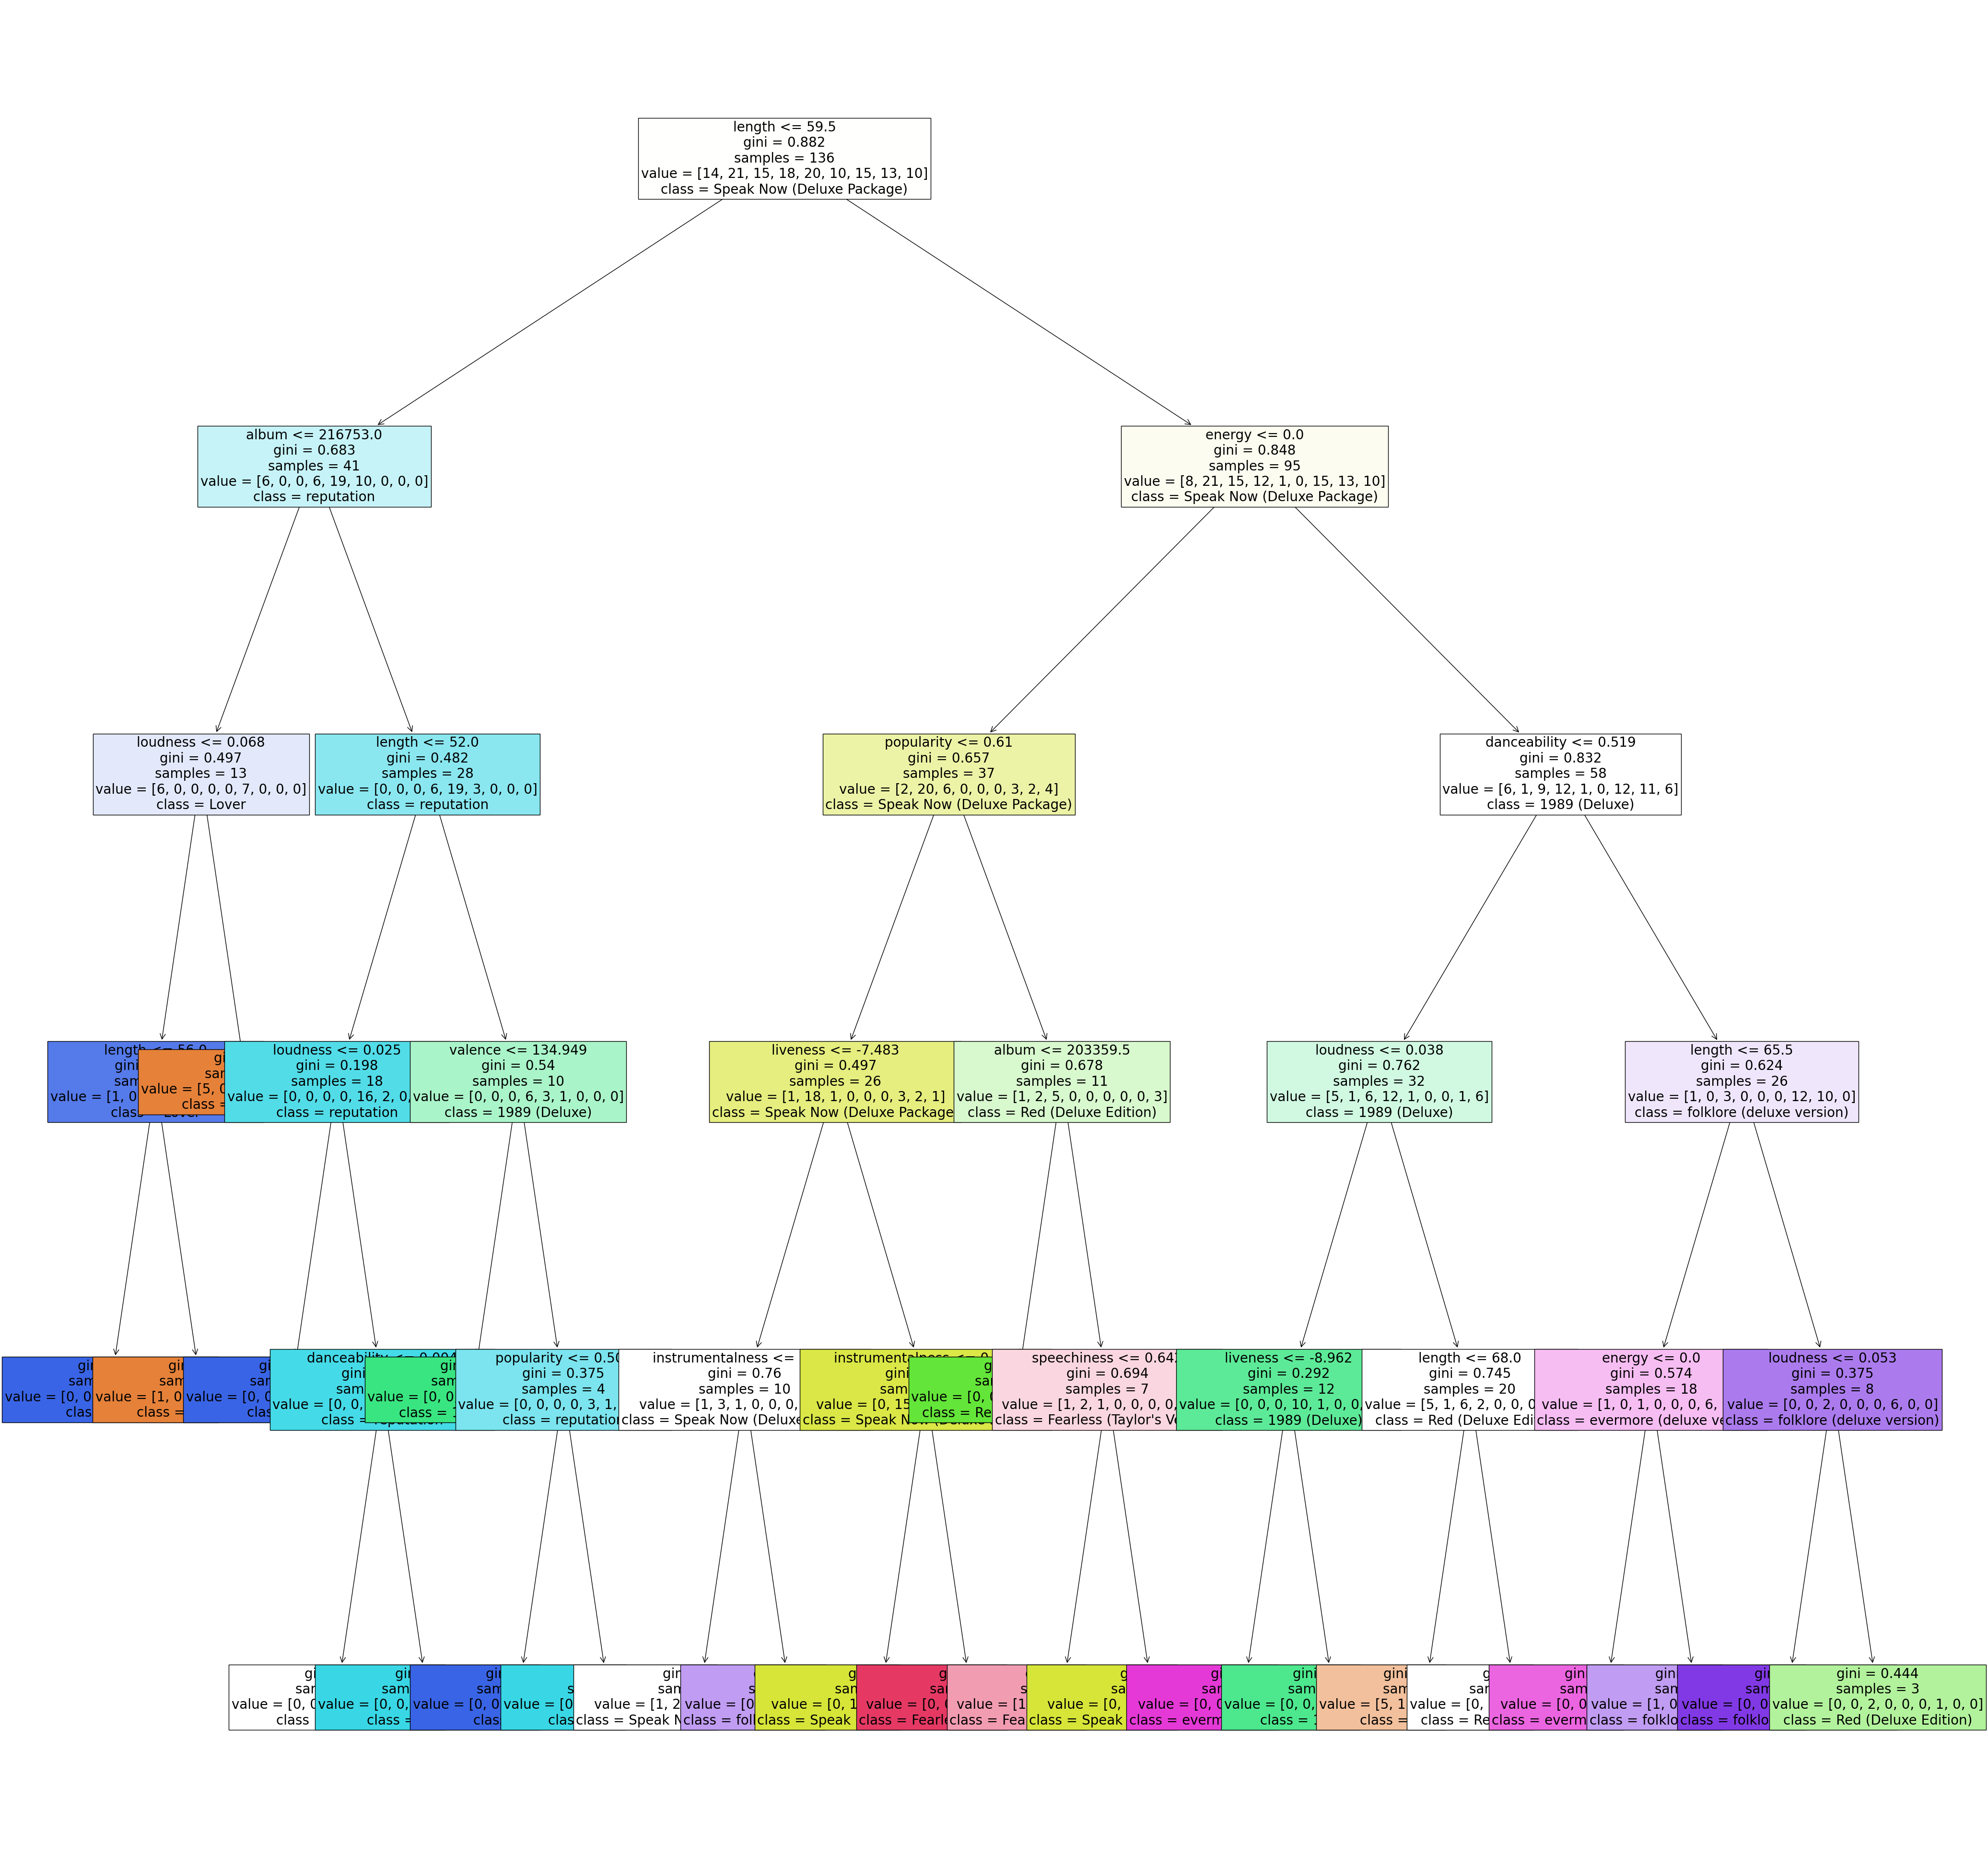

In [14]:
plt.figure(figsize=(50,50))

fn=['album','length','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
cn=["Taylor Swift", "Speak Now (Deluxe Package)", "Red (Deluxe Edition)", "1989 (Deluxe)", "reputation", "Lover", "folklore (deluxe version)", "evermore (deluxe version)","Fearless (Taylor's Version)"]

tree.plot_tree(dtc, feature_names = fn,class_names=cn, filled = True, fontsize=20)
plt.show()

In [15]:
dtc = DecisionTreeClassifier(max_depth = 5, min_samples_split=10)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_score = metrics.accuracy_score(dtc_pred, y_test)
dtc_score

0.4

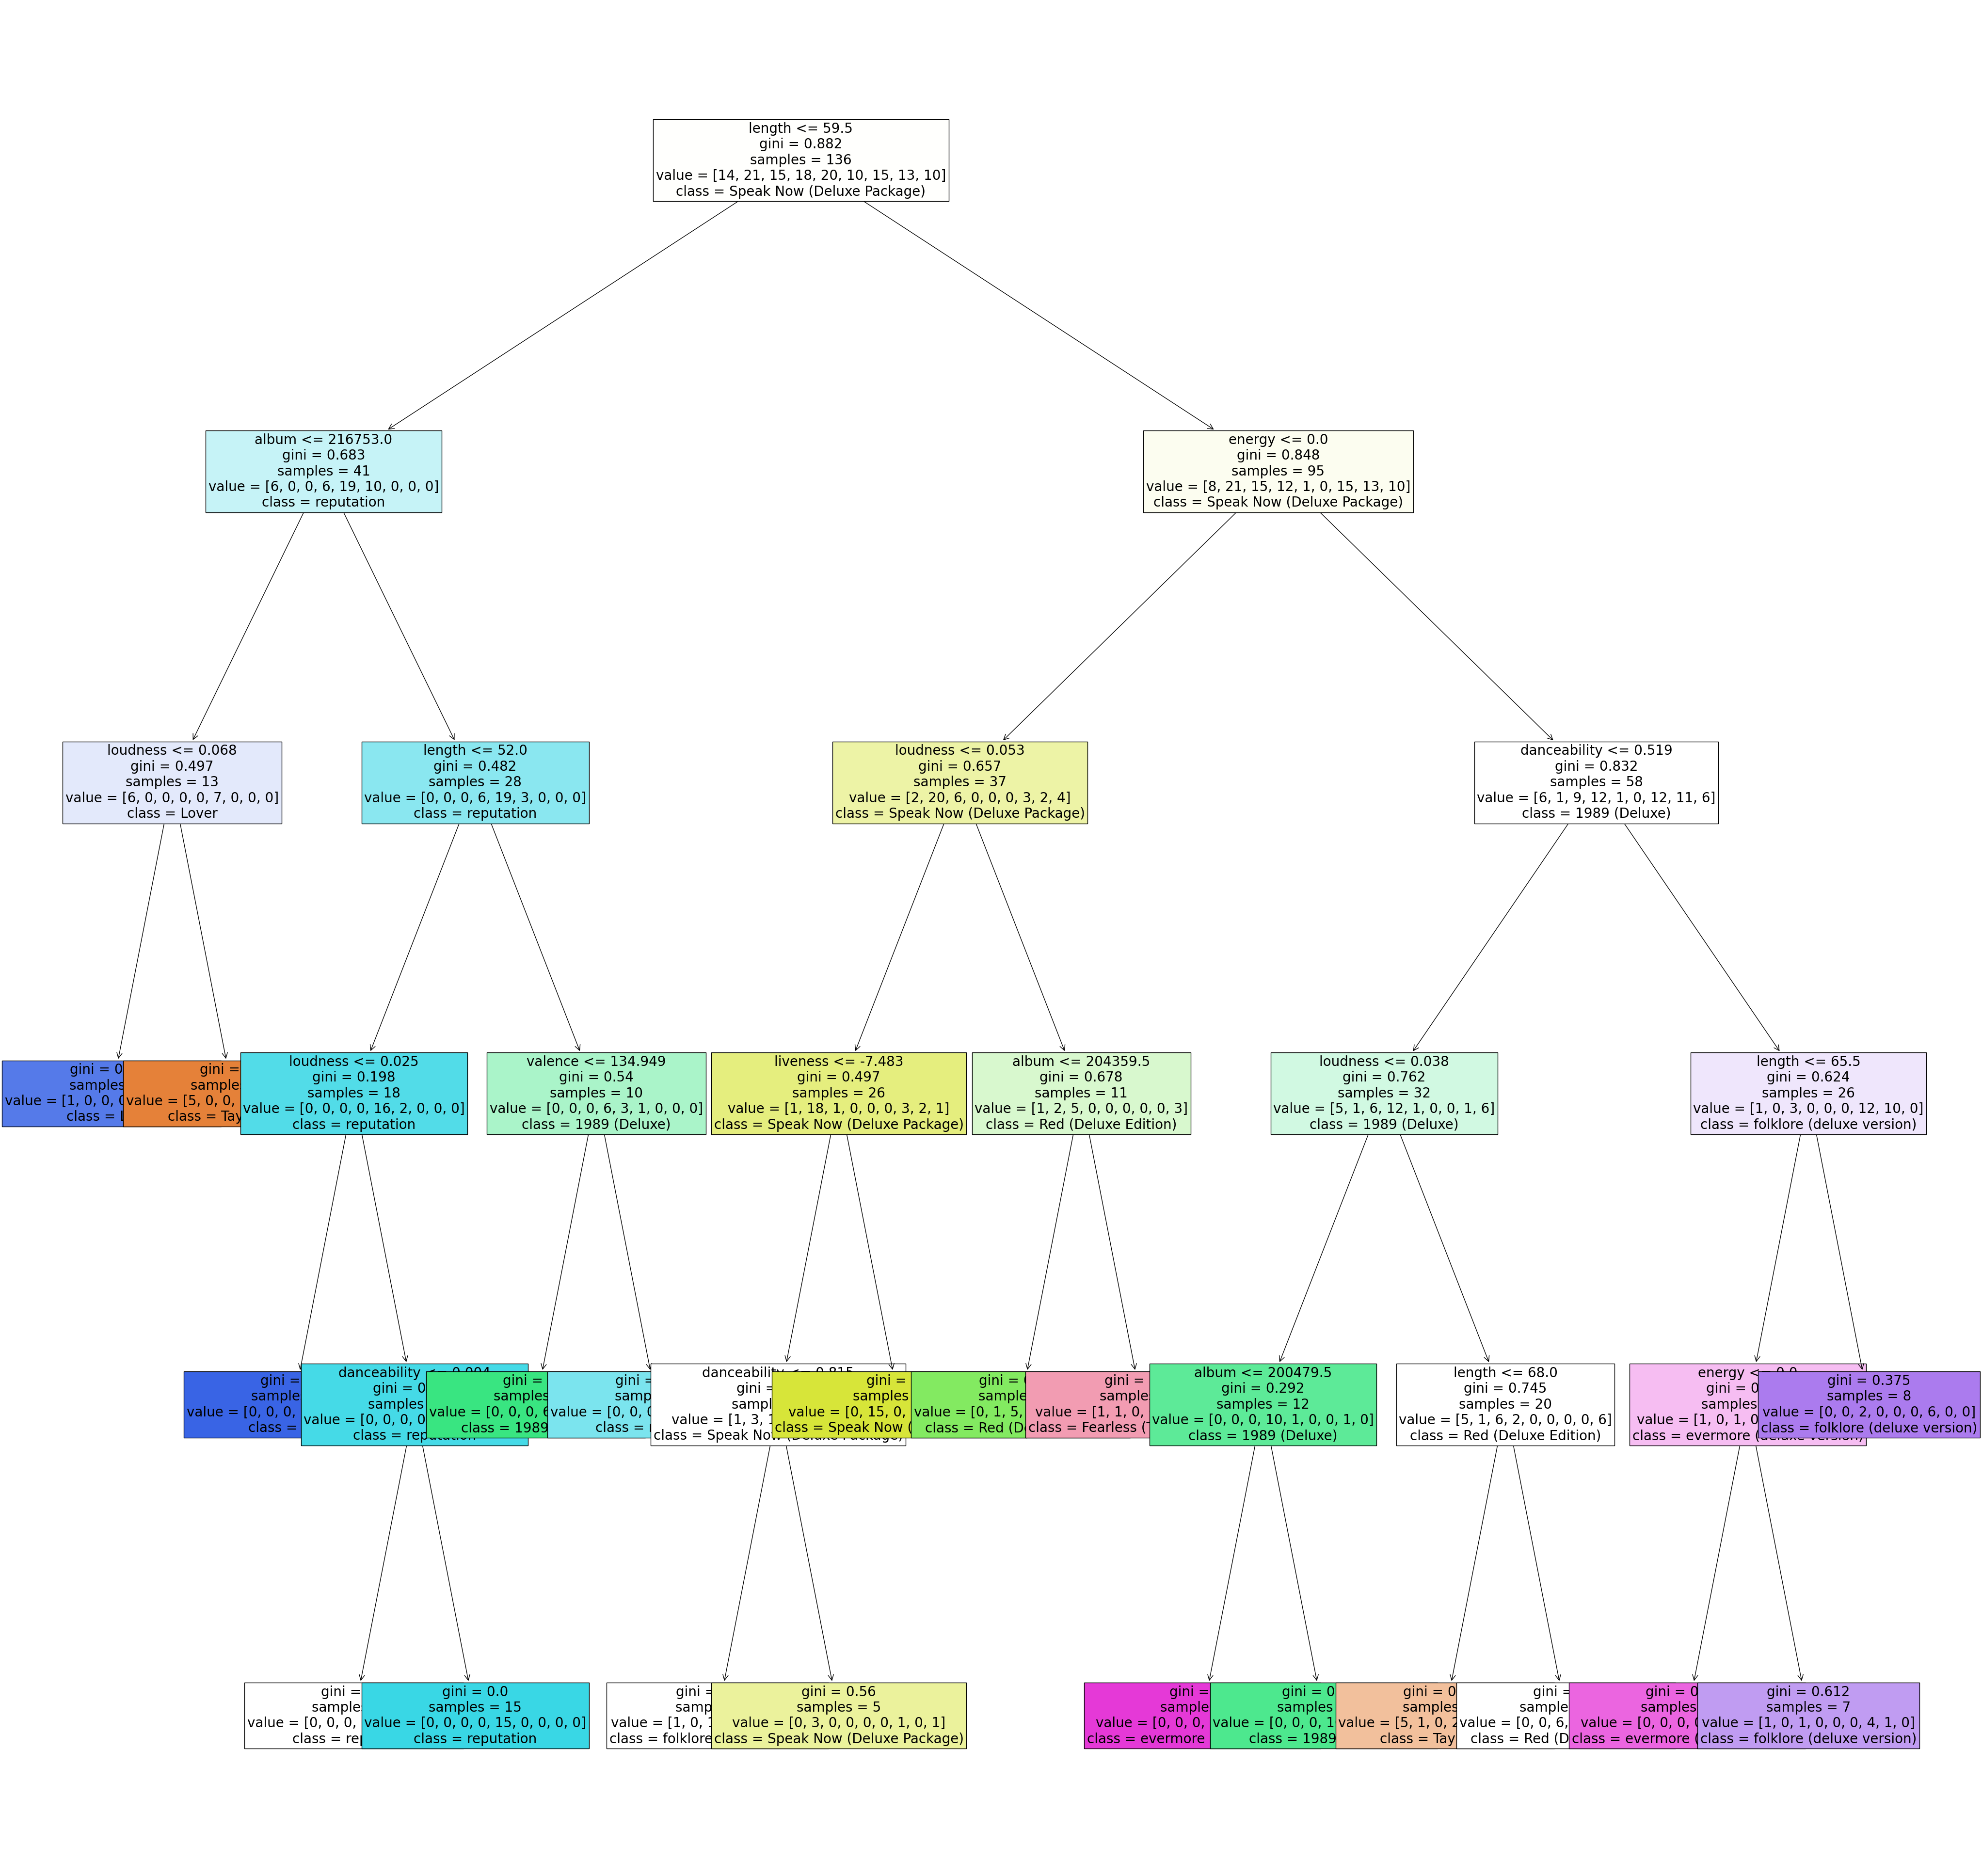

In [16]:
plt.figure(figsize=(50,50))

fn=['album','length','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
cn=["Taylor Swift", "Speak Now (Deluxe Package)", "Red (Deluxe Edition)", "1989 (Deluxe)", "reputation", "Lover", "folklore (deluxe version)", "evermore (deluxe version)","Fearless (Taylor's Version)"]

tree.plot_tree(dtc, feature_names = fn,class_names=cn, filled = True, fontsize=20)
plt.show()

In [17]:
dtc = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes=10)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_score = metrics.accuracy_score(dtc_pred, y_test)
dtc_score

0.37142857142857144

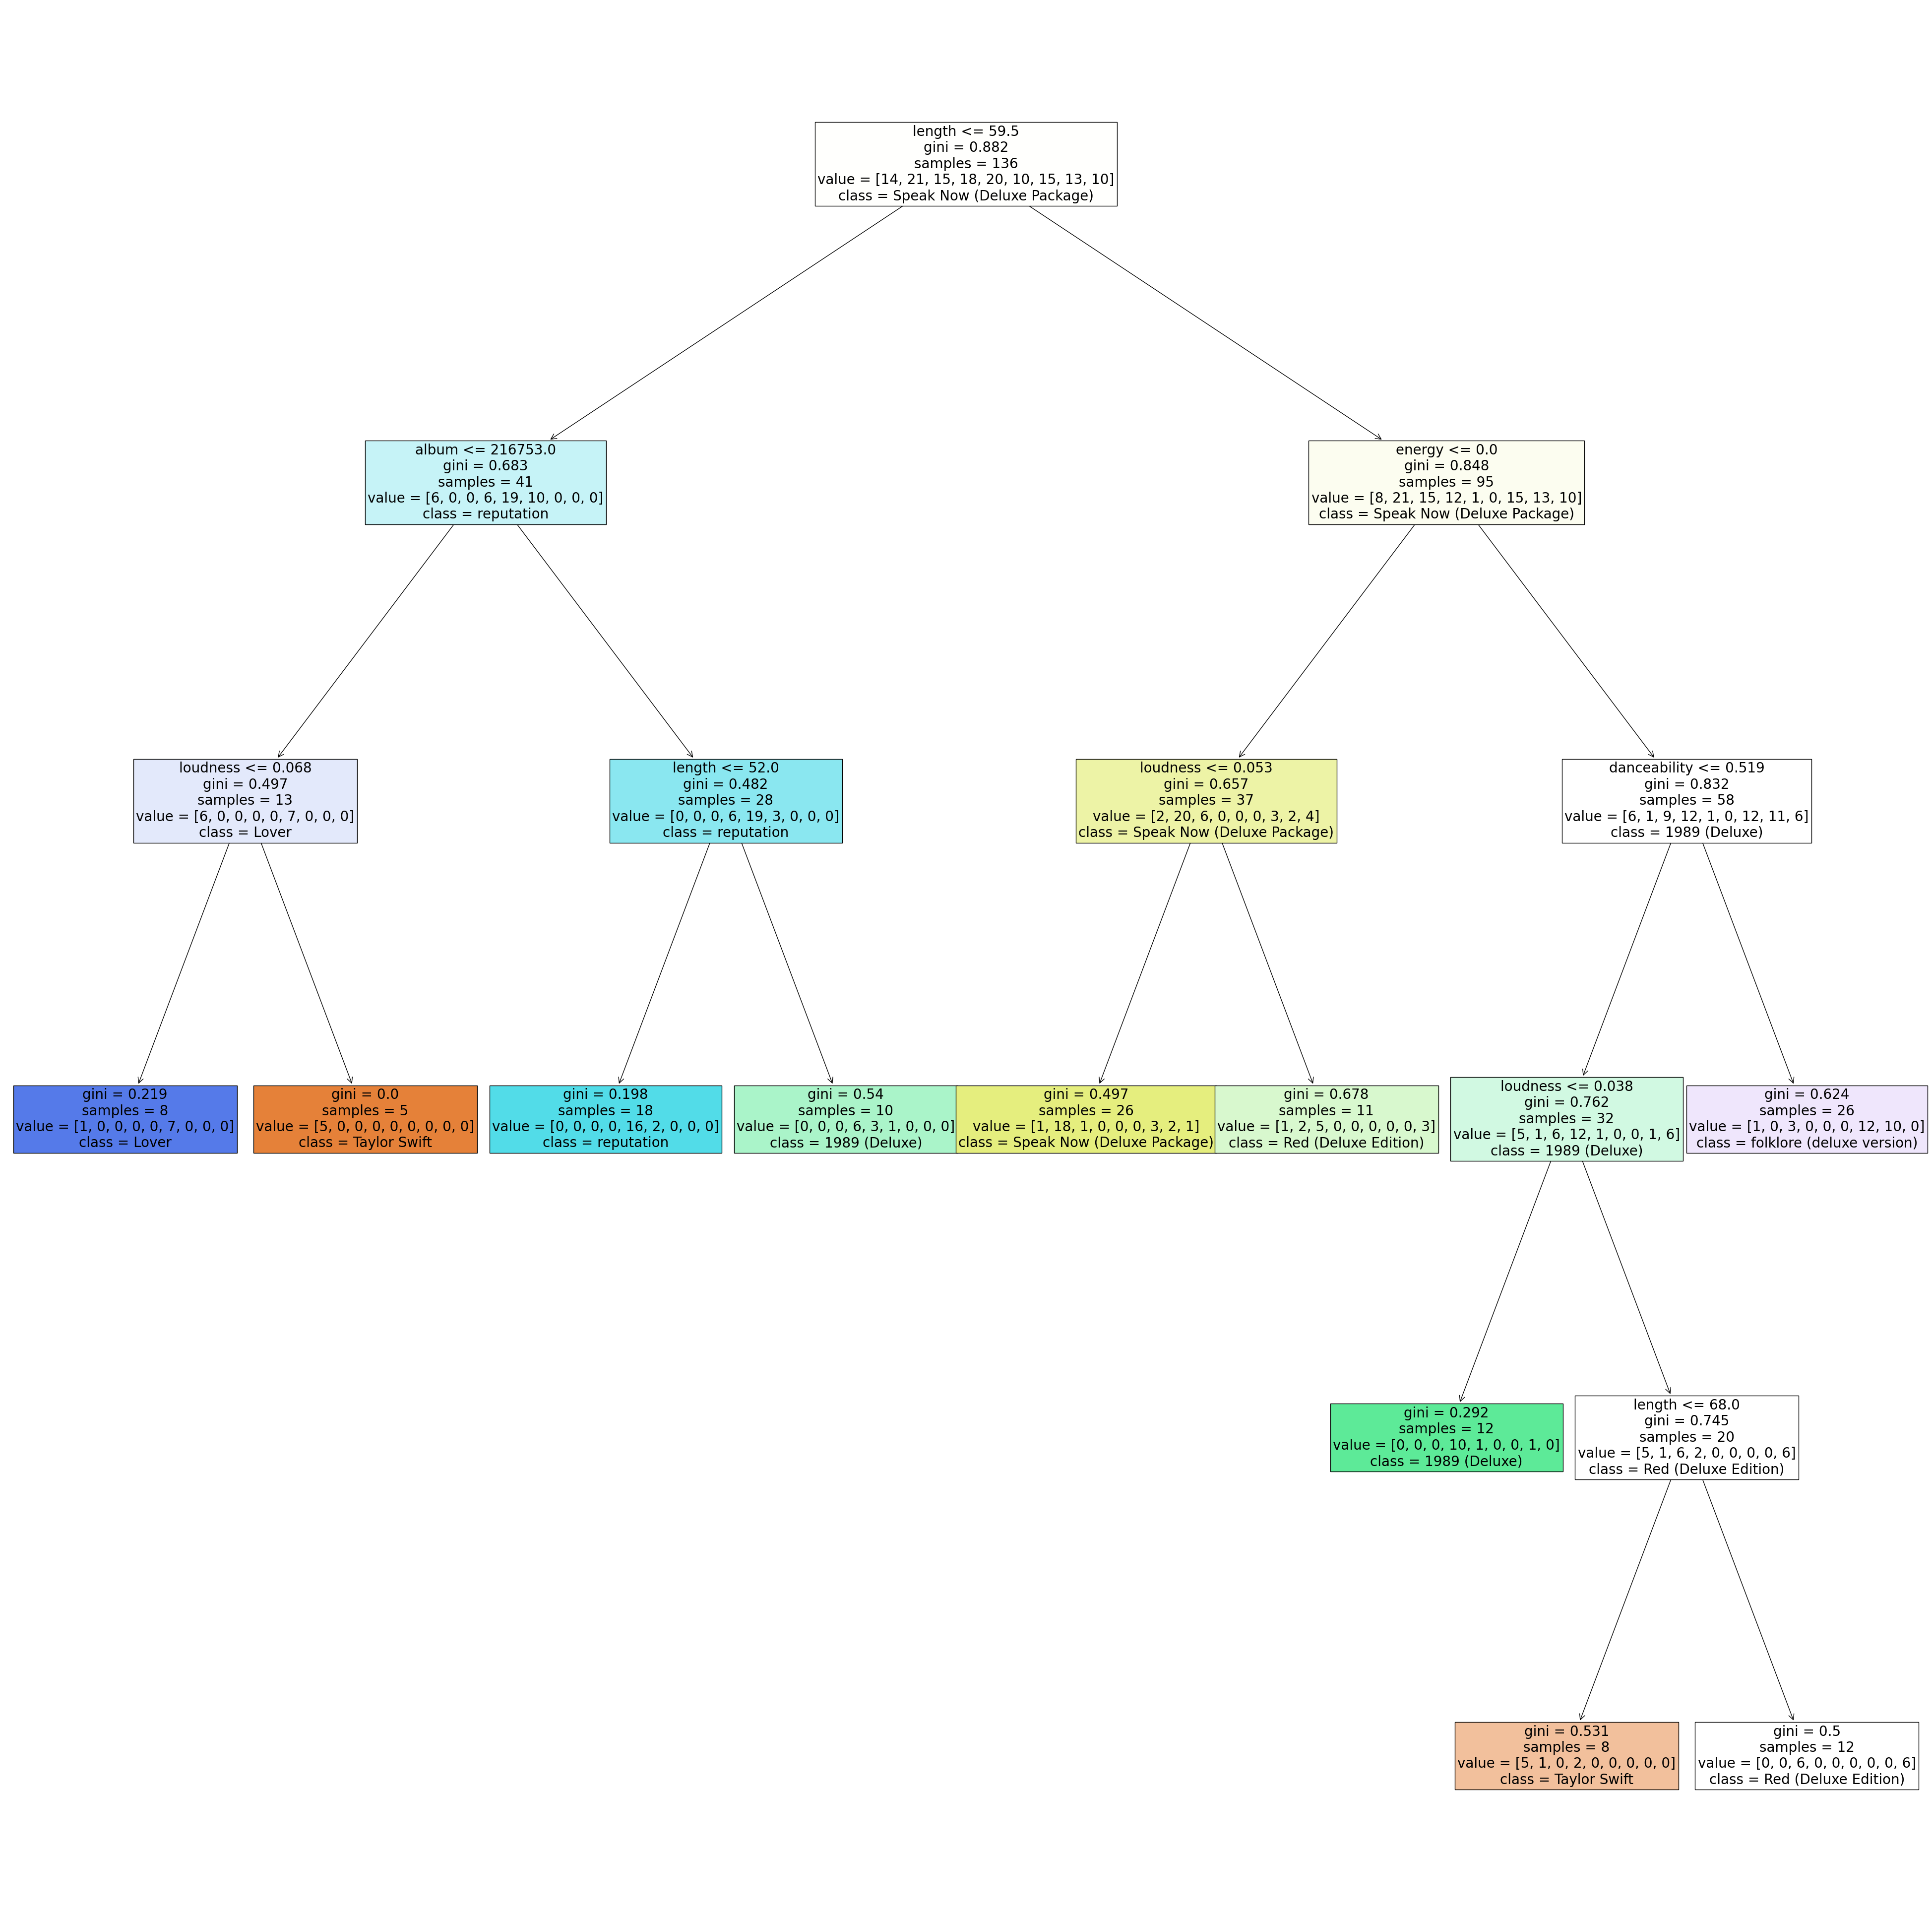

In [18]:
plt.figure(figsize=(50,50))

fn=['album','length','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
cn=["Taylor Swift", "Speak Now (Deluxe Package)", "Red (Deluxe Edition)", "1989 (Deluxe)", "reputation", "Lover", "folklore (deluxe version)", "evermore (deluxe version)","Fearless (Taylor's Version)"]

tree.plot_tree(dtc, feature_names = fn,class_names=cn, filled = True, fontsize=20)
plt.show()

In [19]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_score = metrics.accuracy_score(dtc_pred, y_test)
dtc_score

0.37142857142857144

## Evaluatie/conclusie

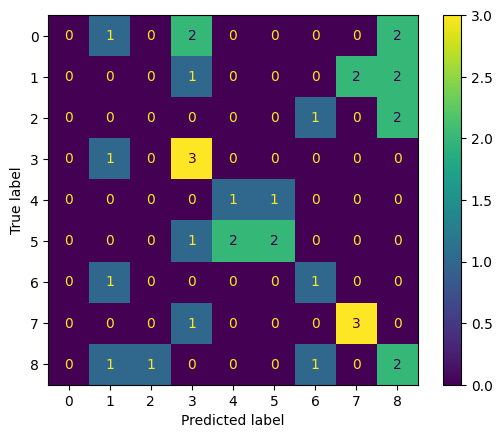

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, gnb_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

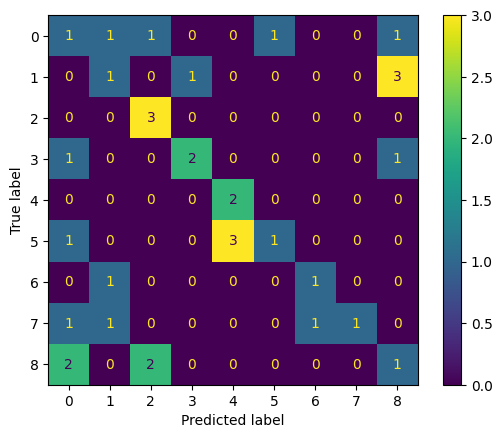

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, dtc_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

Voor de Naive bayes heb ik als resultaat 0.34285714285714286, wat een lage score is. Waar ik denk dat het fout ging is, omdat de naive bayes gebruikt maakt van het berekenen van kansen. Van de verschillende classen die ik heb komen veel van de features overeen met elkaar. Ik denk dat dat veel effect had op de naive bayes.

Voor de Decision tree heb ik voor de beste resultaat 0.42857142857142855, wat ook een lage score is. Ik denk dat de reden dat het hier fout ging is dat er plaats vond van overfitting en ook een vergelijkbaar probleem met de naive bayes. De feautures van de verschillende classifiers kwamen te veel overeen, waardoor het waarschijnlijk ook effect had op het maken van beslissingen.